#### TODO

[ ] Test with 2 different supervised models 

[ ] Attempts with 2 different types of features 

[ ] Parameter Tunning

[ ] Comparison with random chance/supervised baseline

[ ] Interpretation of results 

[ ] Documentation

##### Nice to have
[ ] Testing with a third method (Compare Isolation Forrest, which is the chosen method, with Random Forrest from literature)

[ ] Testing in transfer learning

In [2]:
import os
import pandas as pd

In [3]:
import kagglehub


# Download latest version
path = kagglehub.dataset_download("mishra5001/credit-card")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\andre\.cache\kagglehub\datasets\mishra5001\credit-card\versions\1


In [4]:
files = os.listdir(path)
print("Files:", files)

Files: ['application_data.csv', 'columns_description.csv', 'previous_application.csv']


In [5]:
dfs = {}
for file in files:
    if file.endswith(".csv"):
        file_path = os.path.join(path, file)
        dfs[file] = pd.read_csv(file_path, encoding='cp1252')

### Ingest to bronze layer

In [6]:
application_data_df = dfs['application_data.csv']
columns_description_df = dfs['columns_description.csv']
previous_application_df = dfs['previous_application.csv']

df_application_bronze = application_data_df.copy()
df_previous_application_bronze = previous_application_df.copy()

# Example: access a specific DataFrame
application_data_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(columns_description_df)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN


#### Potential features

- aggregated transactions (combine with grouping transactions | card holder and transaction type | country or merchant group)
- periodic feeatures -> estimate time of new transaction within confidence interval
- compare features: raw, aggregated, extended aggregated and periodic


In [14]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

In [15]:
df_application_bronze.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [16]:
df_previous_application_bronze.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
print("Missing values in application table:")
print(df_application_bronze.isnull().sum())
print("\nPercentage of missing values:")
print((df_application_bronze.isnull().sum() / len(df_application_bronze)) * 100)

Missing values in application table:
SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

Percentage of missing values:
SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64


In [19]:
print("Missing values in previous application table:")
print(df_previous_application_bronze.isnull().sum())
print("\nPercentage of missing values:")
print((df_previous_application_bronze.isnull().sum() / len(df_previous_application_bronze)) * 100)

Missing values in previous application table:
SK_ID_PREV                        0
SK_ID_CURR                        0
NAME_CONTRACT_TYPE                0
AMT_ANNUITY                  372235
AMT_APPLICATION                   0
                              ...  
DAYS_FIRST_DUE               673065
DAYS_LAST_DUE_1ST_VERSION    673065
DAYS_LAST_DUE                673065
DAYS_TERMINATION             673065
NFLAG_INSURED_ON_APPROVAL    673065
Length: 37, dtype: int64

Percentage of missing values:
SK_ID_PREV                    0.000000
SK_ID_CURR                    0.000000
NAME_CONTRACT_TYPE            0.000000
AMT_ANNUITY                  22.286665
AMT_APPLICATION               0.000000
                               ...    
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
Length: 37, dtype: float64


In [21]:
import matplotlib.pyplot as plt

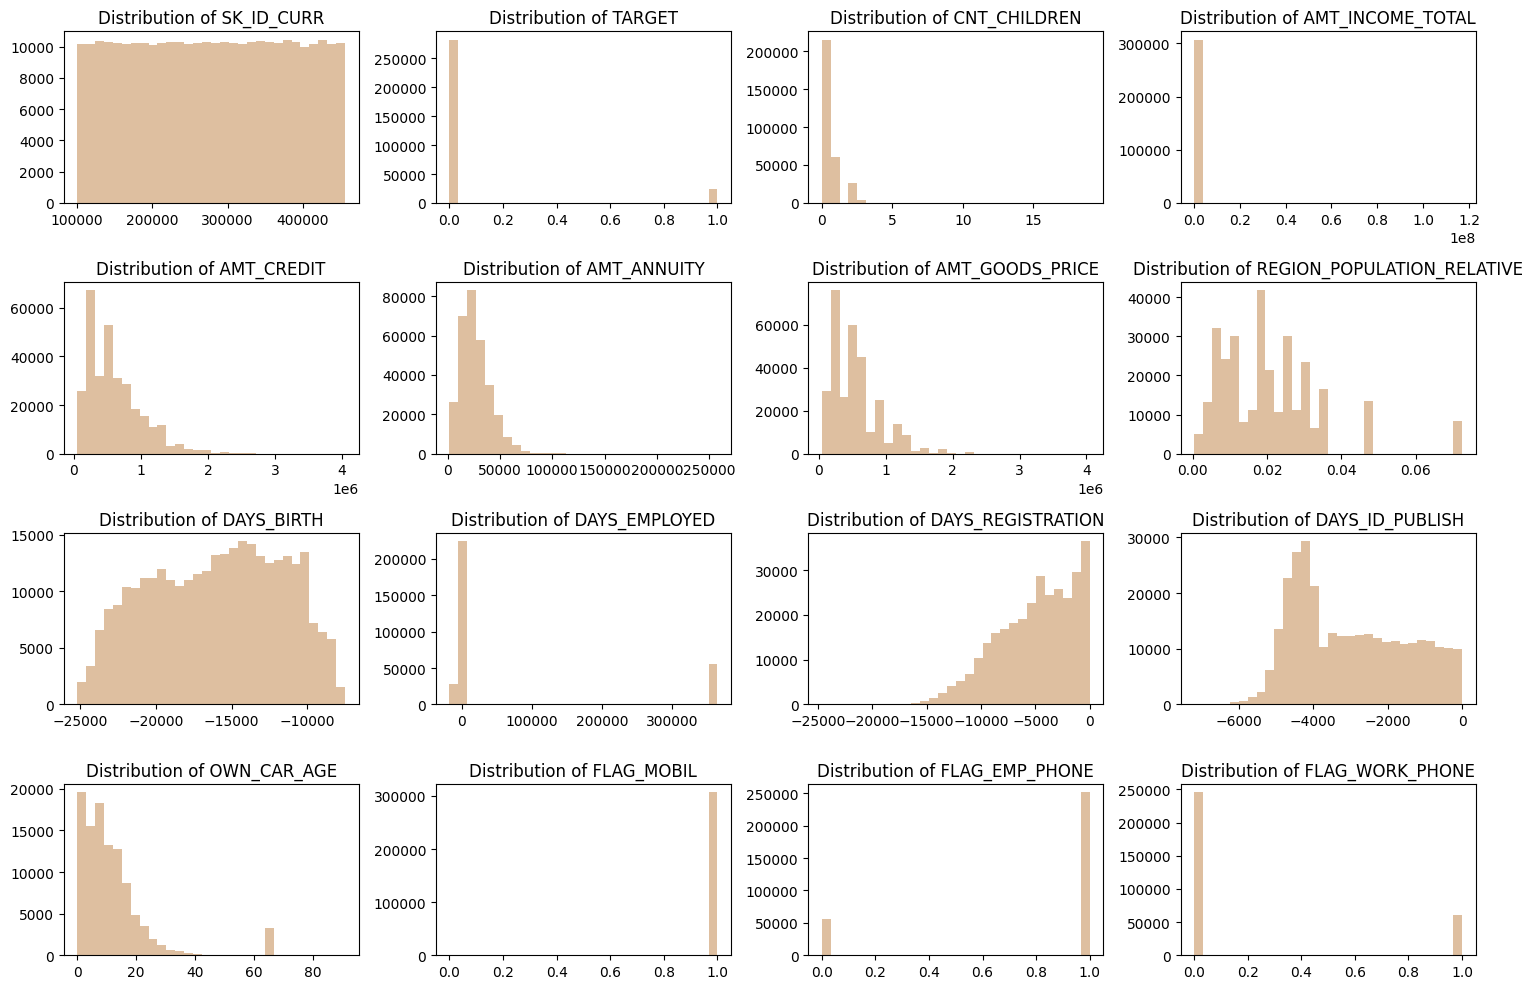

In [40]:
bronze_numerical_values = df_application_bronze.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(15, 10))
max_plots = 16
for i, column in enumerate(bronze_numerical_values.columns[:max_plots]):
    plt.subplot(4, 4, i + 1)
    plt.hist(bronze_numerical_values[column].dropna(), bins=30, color="#d1a478", alpha=0.7)
    plt.title(f"Distribution of {column}")
    plt.tight_layout()
plt.show()

### Transform and Aggregate to Silver Layer

In [ ]:
# Silver Layer: Feature Engineering and Enrichment
print("\nSilver Layer: Creating New Features")

# Start with a copy of the main application data
df_silver = df_application_bronze.copy()

# 1. Feature Engineering on Numerical Columns
print("  - Engineering numerical features...")
# Convert days to years (absolute values for clarity)
df_silver['AGE_YEARS'] = abs(df_silver['DAYS_BIRTH']) / 365
df_silver['EMPLOYMENT_YEARS'] = abs(df_silver['DAYS_EMPLOYED']) / 365

# Create ratio features
df_silver['ANNUITY_INCOME_RATIO'] = df_silver['AMT_ANNUITY'] / df_silver['AMT_INCOME_TOTAL']
df_silver['CREDIT_INCOME_RATIO'] = df_silver['AMT_CREDIT'] / df_silver['AMT_INCOME_TOTAL']
df_silver['EMPLOYMENT_AGE_RATIO'] = df_silver['EMPLOYMENT_YEARS'] / df_silver['AGE_YEARS']

# 2. Aggregation from previous applications
print("  - Aggregating features from previous applications...")
# Group by client ID and aggregate numerical features
prev_app_agg = df_previous_application_bronze.groupby('SK_ID_CURR').agg({
    'AMT_CREDIT': ['mean', 'sum'],
    'AMT_ANNUITY': ['mean'],
    'DAYS_DECISION': ['max']
})

# Rename columns for clarity
prev_app_agg.columns = ['_'.join(col).strip() for col in prev_app_agg.columns.values]
prev_app_agg = prev_app_agg.reset_index()

# Merge the aggregated features with the main dataframe
df_silver = pd.merge(df_silver, prev_app_agg, on='SK_ID_CURR', how='left')

print(df_silver[['SK_ID_CURR', 'TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AGE_YEARS', 'EMPLOYMENT_YEARS', 'CREDIT_INCOME_RATIO', 'AMT_CREDIT_mean', 'AMT_CREDIT_sum']].head())


--- Silver Layer: Creating New Features ---
  - Engineering numerical features...
  - Aggregating features from previous applications...
   SK_ID_CURR  TARGET  AMT_INCOME_TOTAL  AMT_CREDIT  AGE_YEARS  EMPLOYMENT_YEARS  CREDIT_INCOME_RATIO  AMT_CREDIT_mean  AMT_CREDIT_sum
0      100002       1          202500.0    406597.5  25.920548          1.745205             2.007889        179055.00        179055.0
1      100003       0          270000.0   1293502.5  45.931507          3.254795             4.790750        484191.00       1452573.0
2      100004       0           67500.0    135000.0  52.180822          0.616438             2.000000         20106.00         20106.0
3      100006       0          135000.0    312682.5  52.068493          8.326027             2.316167        291695.50       2625259.5
4      100007       0          121500.0    513000.0  54.608219          8.323288             4.222222        166638.75        999832.5


In [45]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

# Gold Layer: Final Model-Ready Data 
df_gold = df_silver.copy()

# 1. Handle Categorical Features
print("\n Gold Layer: Handling Categorical Features ")
# Use one-hot encoding for categorical columns
categorical_cols = [col for col in df_gold.columns if df_gold[col].dtype == 'object']
df_gold = pd.get_dummies(df_gold, columns=categorical_cols, dummy_na=False)

# 2. Handle Missing Values
print("  - Handling missing values...")
# Use a SimpleImputer to fill NaN values with the mean of the column
imputer = SimpleImputer(strategy='mean')
numerical_cols = df_gold.select_dtypes(include=np.number).columns
df_gold[numerical_cols] = imputer.fit_transform(df_gold[numerical_cols])

# 3. Select Features and Target
print("  - Selecting features and target...")
# Separate features (X) from the target (y)
X = df_gold.drop(['TARGET', 'SK_ID_CURR'], axis=1) # Exclude TARGET and ID for unsupervised model training
y = df_gold['TARGET'] # Save TARGET for later evaluation

# 4. Standardize the Data
print("  - Standardizing the features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n Gold Layer: Data Ready for Model Training ")
print(f"Shape of the features (X_scaled): {X_scaled.shape}")
print(f"Shape of the target (y): {y.shape}")

# You can now proceed to Step 3 (Model Implementation & Training)
# using X_scaled as your input data for both One-Class SVM and Isolation Forest.
# The 'y' variable (TARGET) will be used to evaluate the models' performance.


 Gold Layer: Handling Categorical Features 
  - Handling missing values...
  - Selecting features and target...
  - Standardizing the features...

 Gold Layer: Data Ready for Model Training 
Shape of the features (X_scaled): (307511, 253)
Shape of the target (y): (307511,)


In [46]:
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

# X_scaled: The standardized feature data
# y: The target variable (TARGET) for evaluation

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print(" Implementing One-Class SVM ")
# The 'nu' parameter is an upper bound on the fraction of training errors
# and a lower bound of the fraction of support vectors.
# We'll set a reasonable value, e.g., 0.01, assuming a small percentage of anomalies.
oc_svm = OneClassSVM(kernel='rbf', nu=0.01)

# Train the One-Class SVM model on the training data.
# Note: The model is fit to the features (X_train) without using y_train.
oc_svm.fit(X_train)

print(" Implementing Isolation Forest ---")
# The 'contamination' parameter is the expected proportion of outliers in the data.
# This value should be set based on your domain knowledge of the data.
# For this dataset, we can assume a small fraction of anomalies.
iso_forest = IsolationForest(contamination=0.01, random_state=42)

# Train the Isolation Forest model on the training data.
# It also does not use the target variable for training.
iso_forest.fit(X_train)

print("\nModels have been trained successfully!")

 Implementing One-Class SVM 
 Implementing Isolation Forest ---

Models have been trained successfully!


In [47]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test set
# For One-Class SVM, a positive prediction (1) means normal, negative (-1) means an anomaly.
oc_svm_preds = oc_svm.predict(X_test)

# For Isolation Forest, the output is also 1 for inliers and -1 for outliers.
iso_forest_preds = iso_forest.predict(X_test)

# Convert the true labels (y_test) to the same -1/1 format for comparison
# 0 -> 1 (normal), 1 -> -1 (anomaly)
y_test_converted = y_test.apply(lambda x: -1 if x == 1 else 1)

print("\n Evaluation: One-Class SVM ")
print("Confusion Matrix:")
print(confusion_matrix(y_test_converted, oc_svm_preds))
print("\nClassification Report:")
print(classification_report(y_test_converted, oc_svm_preds, target_names=['Anomaly', 'Normal']))

print("\n Evaluation: Isolation Forest ")
print("Confusion Matrix:")
print(confusion_matrix(y_test_converted, iso_forest_preds))
print("\nClassification Report:")
print(classification_report(y_test_converted, iso_forest_preds, target_names=['Anomaly', 'Normal']))


 Evaluation: One-Class SVM 
Confusion Matrix:
[[   90  7323]
 [ 1323 83518]]

Classification Report:
              precision    recall  f1-score   support

     Anomaly       0.06      0.01      0.02      7413
      Normal       0.92      0.98      0.95     84841

    accuracy                           0.91     92254
   macro avg       0.49      0.50      0.49     92254
weighted avg       0.85      0.91      0.88     92254


 Evaluation: Isolation Forest 
Confusion Matrix:
[[   45  7368]
 [  822 84019]]

Classification Report:
              precision    recall  f1-score   support

     Anomaly       0.05      0.01      0.01      7413
      Normal       0.92      0.99      0.95     84841

    accuracy                           0.91     92254
   macro avg       0.49      0.50      0.48     92254
weighted avg       0.85      0.91      0.88     92254

